In [2]:
#Problem Statement
Model Selection using RFE (BoomBike Case Study)


<class 'SyntaxError'>: invalid syntax (<ipython-input-2-cbc1102d1749>, line 2)

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Library Imports

%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5]:
### Understanding the Data

In [6]:
# Importing day.csv
bike_df = pd.read_csv('day.csv')

In [7]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike_df = bike_df.drop(['casual','registered'], axis=1)

In [10]:
### Visualising the Data


In [11]:
bike_df.shape

(730, 14)

In [12]:
cat_vars = ['season','yr', 'mnth', 'dteday','holiday', 'weekday', 'workingday' , 'weathersit']
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']




In [13]:
Visualising Categorical Variables

<class 'SyntaxError'>: invalid syntax (<ipython-input-13-411572ad46c9>, line 1)

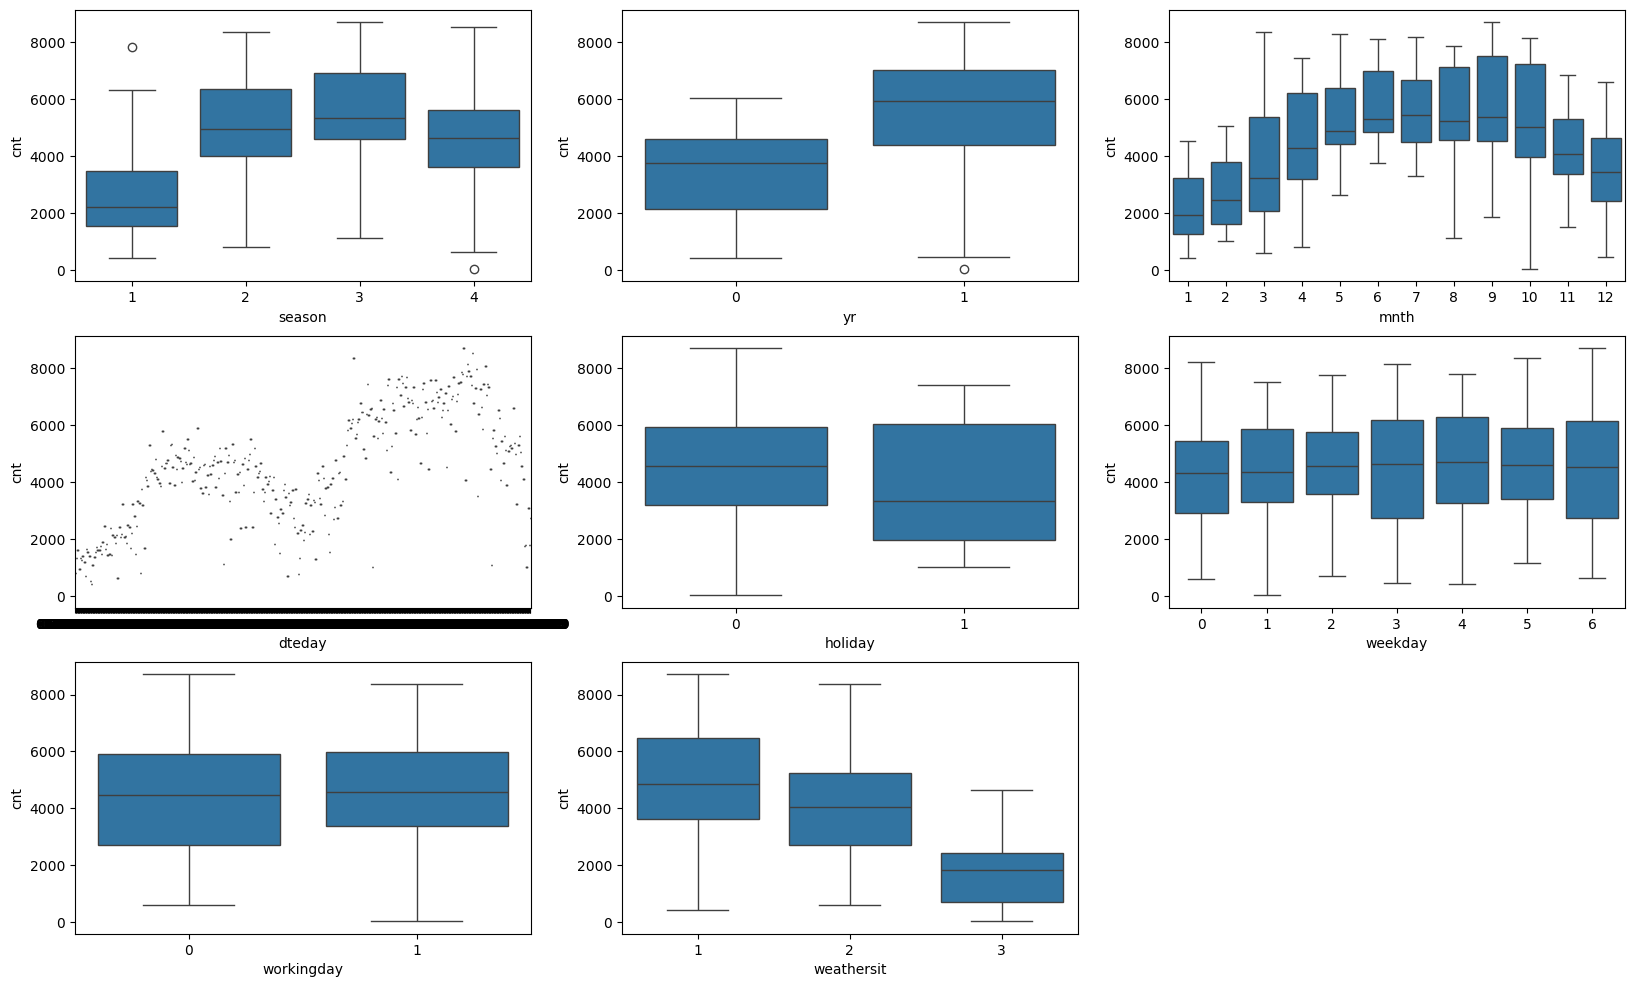

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'dteday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,8)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
#plt.subplot(3,3,9)
#sns.boxplot(x = 'registered', y = 'cnt', data = bike_df)
plt.show()

In [15]:
Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<class 'SyntaxError'>: unterminated string literal (detected at line 2) (<ipython-input-15-18c536412879>, line 2)

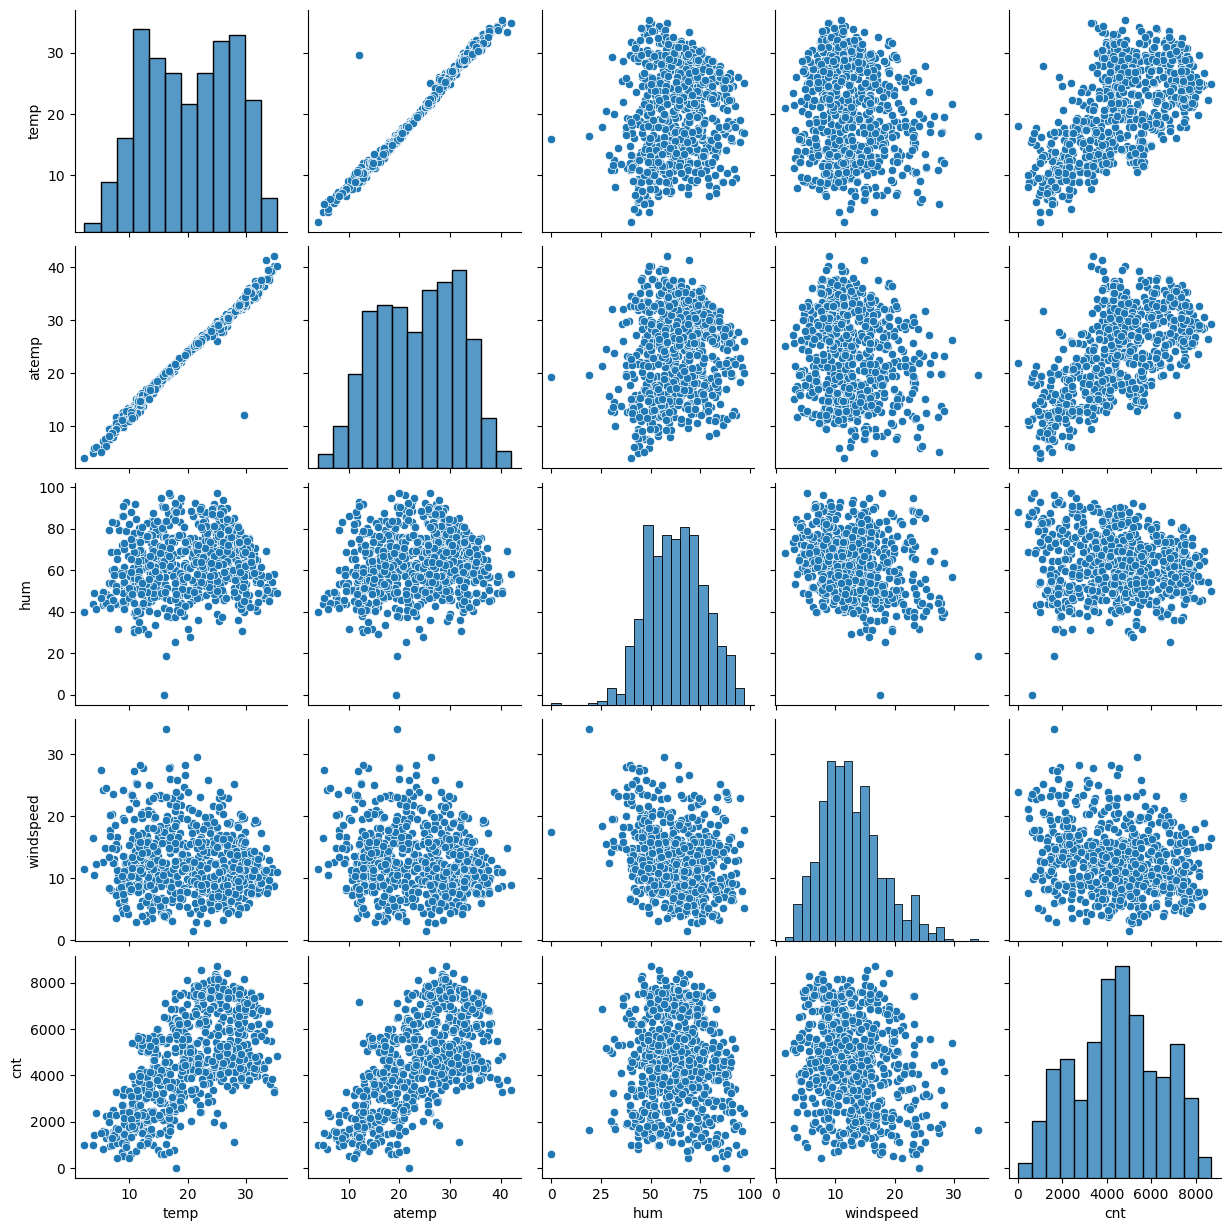

In [16]:
#plt.figure(figsize = (10, 5))
sns.pairplot(bike_df[num_vars])
plt.show()

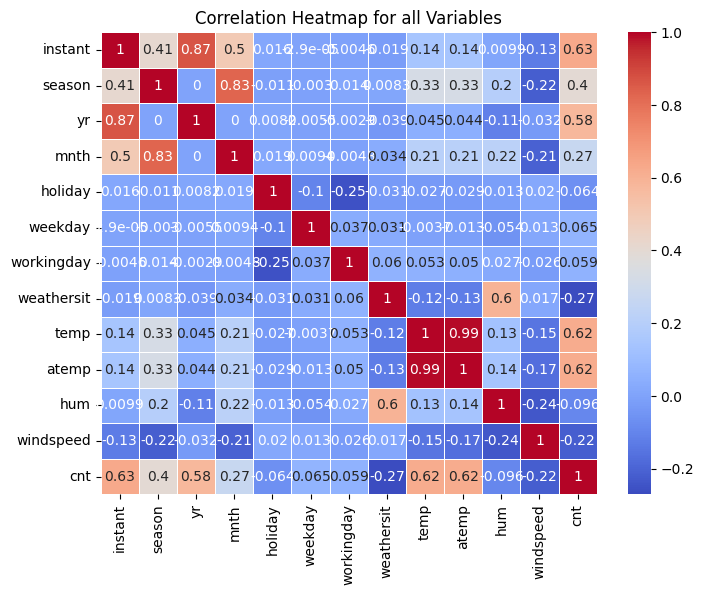

In [17]:
# Create a heatmap for categorical variables
plt.figure(figsize=(8, 6))
sns.heatmap(bike_df.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for all Variables")
plt.show()

In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 77.1+ KB


In [19]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [20]:
### Dummy Variables
The variable Season has Four(4) levels. 
We need to convert these levels into integer as well. For this, we will use something called dummy variables.



<class 'SyntaxError'>: invalid syntax (<ipython-input-20-e2857ee9a40f>, line 2)

In [21]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'

# Let's drop the first column from status df using 'drop_first = True'

season_new = pd.get_dummies(bike_df['season'], drop_first = True)

# Check what the dataset 'season_new' looks like
season_new.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [22]:
# Rename the columns
season_new.rename(columns={2: "summer", 3: "fall", 4: "winter"}, inplace=True)

In [23]:
season_new.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [24]:
Now, we don't need 4 columns. we can drop the spring column, 
as the type of season can be identified with just the last 3 columns where —

000 will correspond to Spring
001 will correspond to Winter
010 will correspond to fall
100 will correspond to summer

<class 'SyntaxError'>: unterminated string literal (detected at line 1) (<ipython-input-24-0e6e84ad5cd4>, line 1)

In [25]:

# Add the results to the original housing dataframe
bike_df = pd.concat([bike_df, season_new], axis = 1)

# Now let's see the head of our dataframe.
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [26]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
 14  summer      730 non-null    uint8  
 15  fall        730 non-null    uint8  
 16  winter      730 non-null    uint8  
dtypes: float64(4), int64(9), object(1), uint8(3)
memory usage: 79.2+ KB


In [27]:
bike_df['weathersit'].describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [28]:
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<class 'SyntaxError'>: invalid syntax (<ipython-input-28-964136fcfff1>, line 1)

In [29]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather_new'

# Let's drop the first column from status df using 'drop_first = True'
weather_new = pd.get_dummies(bike_df['weathersit'], drop_first = True)

# Check what the dataset 'season_new' looks like
weather_new.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
Now, we don't need 4 columns. we can drop the 1st column alias (Clear Weather), 
as the type of season can be identified with just the last 3 columns where —

00 will correspond to weather as  "Clear"
01 will correspond to weather as  "Rainy"
10 will correspond to weather as  "Cloudy"

<class 'SyntaxError'>: unterminated string literal (detected at line 1) (<ipython-input-30-400b14fc3cc3>, line 1)

In [31]:
# Rename the columns
weather_new.rename(columns={2: "Cloudy", 3: "Rainy"}, inplace=True)
weather_new.head()

,Cloudy,Rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [32]:
# Add the results to the original  dataframe
bike_df = pd.concat([bike_df, weather_new], axis = 1)

# Now let's see the head of our dataframe.
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Cloudy,Rainy
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [33]:
# Drop 'Season' & 'Weathersit' as we have created the dummies for it
bike_df.drop(['season'], axis = 1, inplace = True)
bike_df.drop(['weathersit'], axis = 1, inplace = True)

bike_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Cloudy,Rainy
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [34]:
bike_df.holiday.describe()
bike_df.workingday.describe()


count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [35]:
# Dteday to only day as month and Year is already scaled.
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])

# Extract the day from the datetime and store it in a new column "day"
bike_df["day"] = bike_df["dteday"].dt.day
#bike_df.head()



In [36]:
# Drop 'dteday' as we have created the new column for it
bike_df.drop(['dteday'], axis = 1, inplace = True)
bike_df.drop(['instant'], axis = 1, inplace = True)


In [37]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Cloudy      730 non-null    uint8  
 14  Rainy       730 non-null    uint8  
 15  day         730 non-null    int64  
dtypes: float64(4), int64(7), uint8(5)
memory usage: 66.4 KB


In [38]:
## Splitting the Data into Training and Testing Sets

In [39]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Cloudy      730 non-null    uint8  
 14  Rainy       730 non-null    uint8  
 15  day         730 non-null    int64  
dtypes: float64(4), int64(7), uint8(5)
memory usage: 66.4 KB


In [41]:
### Rescaling the Features 

We will use MinMax scaling.

<class 'SyntaxError'>: invalid syntax (<ipython-input-41-0ad0b4cc58fd>, line 3)

In [42]:
#from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
bike_df.shape

(730, 16)

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Cloudy,Rainy,day
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,16
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,31
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0,3
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,30
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,28


In [45]:
Dividing into X and Y sets for the model building

<class 'SyntaxError'>: invalid syntax (<ipython-input-45-3068b24beab6>, line 1)

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Initialize RFE with the desired number of features (10 in this case)
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected features:")
print(selected_features)

Selected features:
Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'summer', 'fall', 'winter', 'Cloudy', 'Rainy',
       'day'],
      dtype='object')


In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Cloudy', True, 1),
 ('Rainy', True, 1),
 ('day', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]

In [50]:
Building model using statsmodel, for the detailed statistics

<class 'SyntaxError'>: invalid syntax (<ipython-input-50-f8c0daeb828c>, line 1)

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.74e-181
Time:                        11:53:11   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     494   BIC:                            -892.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1720      0.030      5.688      0.0

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,58.07
0,const,54.02
7,atemp,53.69
11,fall,6.14
12,winter,5.45
2,mnth,3.91
10,summer,2.68
8,hum,1.92
13,Cloudy,1.60
14,Rainy,1.26


In [57]:
X_train_rfe = X_train_rfe.drop(['atemp'], axis = 1)

In [58]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   temp        510 non-null    float64
 7   hum         510 non-null    float64
 8   windspeed   510 non-null    float64
 9   summer      510 non-null    uint8  
 10  fall        510 non-null    uint8  
 11  winter      510 non-null    uint8  
 12  Cloudy      510 non-null    uint8  
 13  Rainy       510 non-null    uint8  
 14  day         510 non-null    int64  
dtypes: float64(4), int64(6), uint8(5)
memory usage: 46.3 KB


In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.39e-182
Time:                        11:53:14   Log-Likelihood:                 496.20
No. Observations:                 510   AIC:                            -962.4
Df Residuals:                     495   BIC:                            -898.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.030      5.737      0.000       0.114       0.232
yr             0.2322      0.008     27.722      0.000       0.216       0.249
mnth           0.0012      0.002      0.517      0.606      -0.003       0.006
holiday       -0.0643      0.027     -2.374      0.018      -0.118      -0.011
weekday        0.0081      0.002      3.902      0.000       0.004       0.012
workingday     0.0189      0.009      2.083      0.038       0.001       0.037
temp           0.4914      0.034     14.379      0.000       0.424       0.559
hum           -0.1228      0.039     -3.142      0.002      -0.200      -0.046
windspeed     -0.1798      0.027     -6.781      0.000      -0.232      -0.128
summer         0.1170      0.016      7.475      0.000       0.086       0.148
fall           0.0707      0.023      3.073      0.002       0.025       0.116
winter         0.1572      0.022      7.089      0.000       0.114       0.201
Cloudy        -0.0591      0.011     -5.400      0.000      -0.081      -0.038
Rainy         -0.2496      0.027     -9.159      0.000      -0.303      -0.196
day           -0.0004      0.000     -0.762      0.446      -0.001       0.001
==============================================================================
Omnibus:                       70.455   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.159
Skew:                          -0.700   Prob(JB):                     7.57e-40
Kurtosis:                       5.554   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.72
10,fall,6.07
11,winter,5.44
2,mnth,3.91
6,temp,3.52
9,summer,2.68
7,hum,1.92
12,Cloudy,1.60
13,Rainy,1.25
8,windspeed,1.20


In [61]:
X_train_rfe = X_train_rfe.drop(['mnth'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
#vif

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.12e-183
Time:                        11:53:16   Log-Likelihood:                 496.07
No. Observations:                 510   AIC:                            -964.1
Df Residuals:                     496   BIC:                            -904.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1749      0.030      5.862      0.000       0.116       0.234
yr             0.2320      0.008     27.745      0.000       0.216       0.248
holiday       -0.0638      0.027     -2.359      0.019      -0.117      -0.011
weekday        0.0082      0.002      3.941      0.000       0.004       0.012
workingday     0.0188      0.009      2.073      0.039       0.001       0.037
temp           0.4921      0.034     14.425      0.000       0.425       0.559
hum           -0.1209      0.039     -3.110      0.002      -0.197      -0.045
windspeed     -0.1795      0.026     -6.777      0.000      -0.232      -0.127
summer         0.1187      0.015      7.765      0.000       0.089       0.149
fall           0.0760      0.021      3.698      0.000       0.036       0.116
winter         0.1664      0.013     12.599      0.000       0.140       0.192
Cloudy        -0.0594      0.011     -5.440      0.000      -0.081      -0.038
Rainy         -0.2503      0.027     -9.209      0.000      -0.304      -0.197
day           -0.0004      0.000     -0.744      0.457      -0.001       0.001
==============================================================================
Omnibus:                       70.804   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.650
Skew:                          -0.702   Prob(JB):                     3.59e-40
Kurtosis:                       5.565   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_train_rfe = X_train_rfe.drop(['day'], axis = 1)

# Adding a constant variable 
#import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
#vif

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.00e-184
Time:                        11:53:18   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1717      0.030      5.818      0.000       0.114       0.230
yr             0.2319      0.008     27.752      0.000       0.216       0.248
holiday       -0.0642      0.027     -2.373      0.018      -0.117      -0.011
weekday        0.0081      0.002      3.924      0.000       0.004       0.012
workingday     0.0187      0.009      2.061      0.040       0.001       0.037
temp           0.4934      0.034     14.485      0.000       0.426       0.560
hum           -0.1235      0.039     -3.191      0.002      -0.200      -0.047
windspeed     -0.1800      0.026     -6.802      0.000      -0.232      -0.128
summer         0.1176      0.015      7.733      0.000       0.088       0.147
fall           0.0742      0.020      3.637      0.000       0.034       0.114
winter         0.1646      0.013     12.682      0.000       0.139       0.190
Cloudy        -0.0586      0.011     -5.396      0.000      -0.080      -0.037
Rainy         -0.2493      0.027     -9.187      0.000      -0.303      -0.196
==============================================================================
Omnibus:                       72.701   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.556
Skew:                          -0.720   Prob(JB):                     3.09e-41
Kurtosis:                       5.590   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,51.67
9,fall,4.78
5,temp,3.50
8,summer,2.54
6,hum,1.89
10,winter,1.87
11,Cloudy,1.58
12,Rainy,1.25
7,windspeed,1.20
2,holiday,1.08


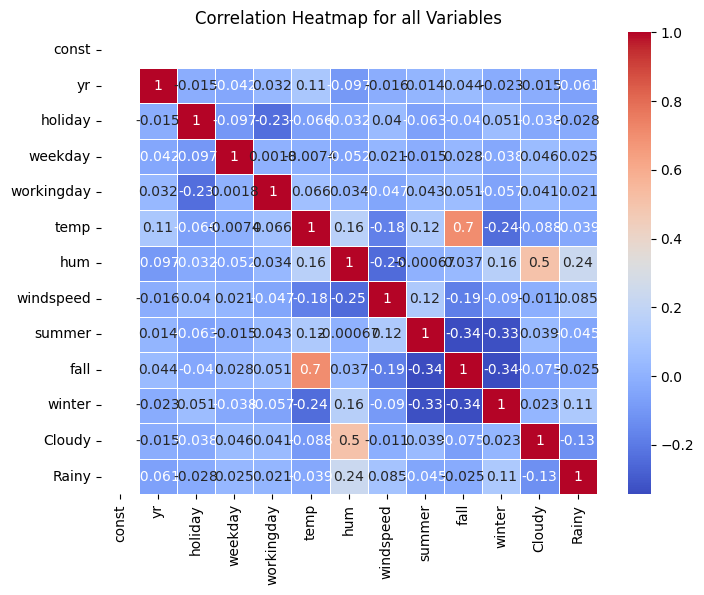

In [64]:
# Create a heatmap for categorical variables
plt.figure(figsize=(8, 6))
sns.heatmap(X_train_rfe.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for all Variables")
plt.show()

Text(0.5, 0, 'Errors')

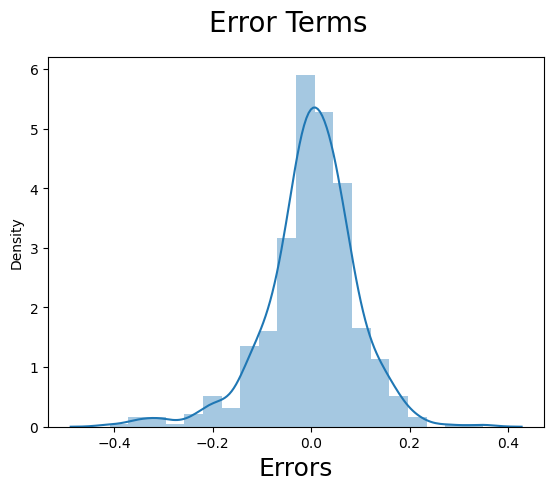

In [65]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_cnt = lm.predict(X_train_rfe)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X

In [66]:
###Applying the scaling on the test sets :

In [67]:
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [68]:
y_test = df_test.pop('cnt')
X_test = df_test



In [69]:
X_train_rfe = X_train_rfe.drop(['const'],axis=1)

In [70]:
# Now let's use our model to make predictions.


# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new= sm.add_constant(X_test_new)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [72]:
## Model Evaluation

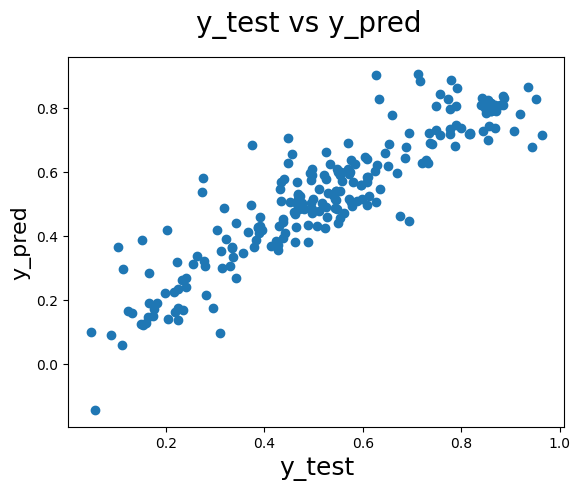

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8090957848843591

In [1]:
#lm.summary()